Open this file using Google Colab using the link provided:
https://colab.research.google.com/drive/1R6tYjW7890mCKQW9dpLMhaacKjrXKBZ6?usp=sharing

In [ ]:
!pip install mapbox transbigdata keplergl scikit-mobility openrouteservice networkx

In [ ]:
import skmob
from skmob.utils import utils, constants
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import numpy as np
from mapbox import Directions
import transbigdata as tbd
import networkx as nx
from shapely.geometry import MultiLineString, LineString, Point
import requests
import zipfile
import io
import openrouteservice
from openrouteservice import convert
import json

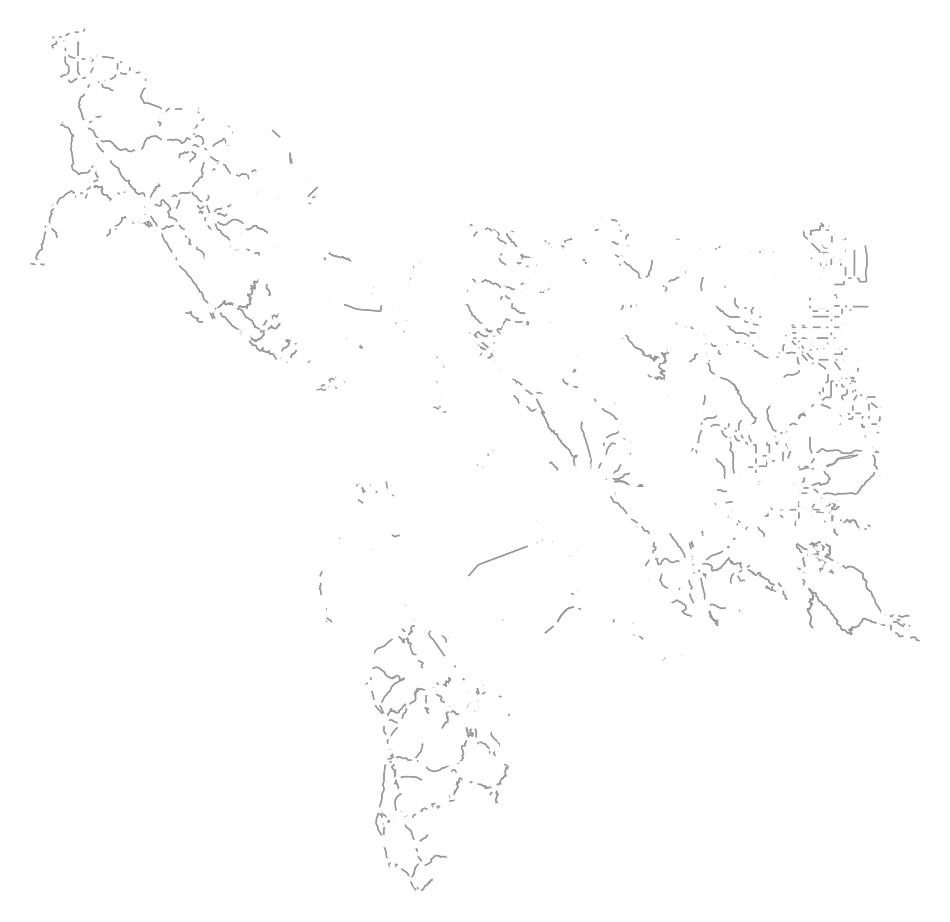

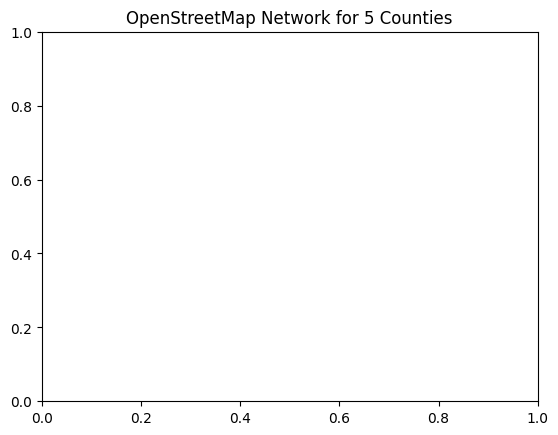

In [ ]:
counties = ['San Francisco County, California, USA',
            'San Mateo County, California, USA',
            'Alameda County, California, USA',
            'Contra Costa County, California, USA',
            'Marin County, California, USA']
G = ox.graph_from_place(counties, network_type='drive')

fig, ax = plt.subplots(figsize=(12, 12))
ox.plot_graph(G, ax=ax)
plt.title('Bay Area Street Network')
plt.show()

In [ ]:
CO2_ev = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CO2_ev.csv')
CO2_bike = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CO2_bike.csv')
CO2_transit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CO2_transit.csv')
CO2_walk = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CO2_walk.csv')
CO2_gascar = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CO2_gascar.csv')

In [ ]:
# New York Sate (FIFP=36) block shapfile data
url = "https://www2.census.gov/geo/tiger/TIGER2020/TABBLOCK20/tl_2020_36_tabblock20.zip"
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))
zip_file.extractall()
gdf = gpd.read_file('tl_2020_36_tabblock20.shp')

# Filter the data to include only NYC counties
nyc_counties = ["005", "047", "061", "081", "085"]
nyc_block_data = gdf[gdf["COUNTYFP20"].isin(nyc_counties)]

# Filter out water features (coastline)
nyc_block_data = nyc_block_data[nyc_block_data["ALAND20"] > 0]

# Desired block group variable
nyc_block_data = nyc_block_data[["GEOID20", "geometry"]]
nyc_block_data = nyc_block_data.rename(columns={"GEOID20": "GEOID"})
nyc_block_data['GEOID'] = nyc_block_data['GEOID'].str[:-3]

GEOID                                           geometry
210  360810656001  POLYGON ((-73.73351 40.66322, -73.73186 40.664...
242  360810155001  POLYGON ((-73.91740 40.75822, -73.91549 40.760...
243  360811187001  POLYGON ((-73.81227 40.76113, -73.81105 40.761...
244  360810991005  POLYGON ((-73.80140 40.79429, -73.80034 40.794...
245  360810240001  POLYGON ((-73.80923 40.70370, -73.80879 40.703...

In [ ]:
# Remove duplicates keeping the first occurrence
nyc_block_data_unique = nyc_block_data.drop_duplicates(subset=['GEOID'], keep='first')
# Convert the 'origin_bgrp_fips_2020' column to string
CO2_ev['origin_bgrp_fips_2020'] = CO2_ev['origin_bgrp_fips_2020'].astype(str)
# Merge using the cleaned-up or aggregated nyc_block_data
merged_data = pd.merge(CO2_ev, nyc_block_data_unique, left_on='origin_bgrp_fips_2020', right_on='GEOID', how='left')

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()
data_within_shape = tbd.clean_outofshape(CO2_ev, nyc_block_data, col=['origin_bgrp_lng_2020','origin_bgrp_lat_2020'])
tbd.visualization_data(data_within_shape, col=['origin_bgrp_lng_2020','origin_bgrp_lat_2020'], accuracy=500, height=800) #meter

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'ytak0zp', 'type': …

In [ ]:
data_within_shape = tbd.clean_outofshape(CO2_gascar, nyc_block_data, col=['origin_bgrp_lng_2020','origin_bgrp_lat_2020'])
tbd.visualization_data(data_within_shape, col=['origin_bgrp_lng_2020','origin_bgrp_lat_2020'], accuracy=500, height=800) #meter

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'ytak0zp', 'type': …

In [ ]:
data_within_shape = tbd.clean_outofshape(CO2_bike, nyc_block_data, col=['origin_bgrp_lng_2020','origin_bgrp_lat_2020'])
tbd.visualization_data(data_within_shape, col=['origin_bgrp_lng_2020','origin_bgrp_lat_2020'], accuracy=500, height=800) #meter

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'ytak0zp', 'type': …

In [ ]:
data_within_shape = tbd.clean_outofshape(CO2_walk, nyc_block_data, col=['origin_bgrp_lng_2020','origin_bgrp_lat_2020'])
tbd.visualization_data(data_within_shape, col=['origin_bgrp_lng_2020','origin_bgrp_lat_2020'], accuracy=500, height=800) #meter

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'ytak0zp', 'type': …

In [ ]:
data_within_shape = tbd.clean_outofshape(CO2_transit, nyc_block_data, col=['origin_bgrp_lng_2020','origin_bgrp_lat_2020'])
tbd.visualization_data(data_within_shape, col=['origin_bgrp_lng_2020','origin_bgrp_lat_2020'], accuracy=500, height=800) #meter

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'ytak0zp', 'type': …

In [ ]:
CO2_ev.shape

(28926, 21)

In [ ]:
CO2_bike.shape

(337781, 21)

In [ ]:
CO2_gascar.shape

(3585378, 21)

In [ ]:
CO2_walk.shape

(5906532, 21)

In [ ]:
CO2_gascar.head()

trip_start_time  trip_duration_minutes   primary_mode  trip_distance_meters  \
0        12:41:00                     13  other_non_bev           1951.830741   
1        21:43:00                      2  other_non_bev           1165.642413   
2        16:56:00                     10  other_non_bev           7990.030287   
3        08:23:00                     30  other_non_bev          19323.013189   
4        09:44:00                      7  other_non_bev           3385.874490   

   origin_bgrp_fips_2020  origin_bgrp_lat_2020  origin_bgrp_lng_2020  \
0           360470218003               40.6357              -74.0000   
1           360610093001               40.7471              -73.9990   
2           360610219001               40.8177              -73.9586   
3           360810479002               40.7369              -73.8854   
4           360050118001               40.8110              -73.8000   

   destination_bgrp_fips_2020  destination_bgrp_lat_2020  \
0                360470190001                    40.6228   
1                360610093002                    40.7458   
2                360610117002                    40.7611   
3                360050194001                    40.8335   
4                360050184003                    40.8357   

   destination_bgrp_lng_2020  ...  trip_taker_home_bgrp_lat_2020  \
0                   -73.9992  ...                        40.6357   
1                   -74.0000  ...                        40.7458   
2                   -74.0000  ...                        40.7611   
3                   -73.8361  ...                        40.8110   
4                   -73.8304  ...                        40.8110   

   trip_taker_home_bgrp_lng_2020  trip_taker_person_id  trip_taker_age  \
0                          -74.0   7824204346816725785              22   
1                          -74.0   3141389184928565378              48   
2                          -74.0  15618596185780471434              42   
3                          -73.8    757683799785607979              49   
4                          -73.8  17405751022549670665              53   

   trip_taker_sex     trip_taker_race_ethnicity trip_taker_education  \
0          female  white_not_hispanic_or_latino         some_college   
1            male  white_not_hispanic_or_latino      advanced_degree   
2            male     hispanic_or_latino_origin         some_college   
3          female  white_not_hispanic_or_latino      advanced_degree   
4          female     hispanic_or_latino_origin     bachelors_degree   

  trip_taker_individual_income  emission_factor  co2_emissions_grams  
0                        11329            251.0           489.909516  
1                       117756            251.0           292.576246  
2                        95783            251.0          2005.497602  
3                       134115            251.0          4850.076310  
4                        44961            251.0           849.854497  

[5 rows x 21 columns]

In [ ]:
# Your Mapbox access token
access_token = 'pk.eyJ1IjoiemV5dXd1MjAwMSIsImEiOiJjbHYxZjN1bWkwNmNrMmtwNzg5MzBhbTBhIn0.bzHjCMX2yvJdC-FkMckvJw'

# Setup Mapbox Directions client
service = Directions(access_token=access_token)

def get_route(row):
    # Prepare the start and end points
    origin = {'type': 'Feature', 'properties': {}, 'geometry': {'type': 'Point', 'coordinates': [row['origin_bgrp_lng_2020'], row['origin_bgrp_lat_2020']]}}
    destination = {'type': 'Feature', 'properties': {}, 'geometry': {'type': 'Point', 'coordinates': [row['destination_bgrp_lng_2020'], row['destination_bgrp_lat_2020']]}}

    # Create the request for the routing service
    response = service.directions([origin, destination], 'mapbox/driving', steps=True)

    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()
        # Extract the route polyline (geometry)
        routes = data['routes']
        if routes:
            return routes[0]['geometry']
    return None

In [ ]:
CO2_gascar['shortest_path'] = CO2_gascar.apply(get_route, axis=1)

In [ ]:
client = openrouteservice.Client(key='5b3ce3597851110001cf6248ba5825508ddc4520b0b7ed1b2d6bc14b')

def get_route(row):
    coords = ((row['origin_bgrp_lng_2020'], row['origin_bgrp_lat_2020']),
              (row['destination_bgrp_lng_2020'], row['destination_bgrp_lat_2020']))
    routes = client.directions(coords)
    geometry = routes['routes'][0]['geometry']
    decoded = convert.decode_polyline(geometry)
    return decoded['coordinates']

CO2_gascar['shortest_path'] = CO2_gascar.apply(get_route, axis=1)